In [33]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_file = "data/city_data.csv"
ride_file = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_file)
ride_data = pd.read_csv(ride_file)
# Combine the data into a single dataset
city_ride = pd.merge(city_data, ride_data, how = "outer", on = "city" )
# Display the data table for preview
city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [34]:
city_grp = city_ride.groupby(["city"])
city_grp.count().head()

,driver_count,type,date,fare,ride_id
city,,,,,
Amandaburgh,18,18,18,18,18
Barajasview,22,22,22,22,22
Barronchester,16,16,16,16,16
Bethanyland,18,18,18,18,18
Bradshawfurt,10,10,10,10,10


## Bubble Plot of Ride Sharing Data

In [35]:
avg_fare = city_grp["fare"].mean()
total_rides = city_grp["ride_id"].count()
driver_count = city_grp["driver_count"].sum()
total_driver = (driver_count / total_rides)

types = city_ride.groupby(["type"])

scatt = pd.DataFrame({"AverageFare": avg_fare, "TotalRides": total_rides, "TotalDrivers": total_driver})

scatt["AverageFare"] = scatt["AverageFare"].round(2)
scatt["AverageFare"] = scatt["AverageFare"].map("$ {:,.2f}".format)
scatt.head()

,AverageFare,TotalRides,TotalDrivers
city,,,
Amandaburgh,$ 24.64,18,12.0
Barajasview,$ 25.33,22,26.0
Barronchester,$ 36.42,16,11.0
Bethanyland,$ 32.96,18,22.0
Bradshawfurt,$ 40.06,10,7.0


In [36]:
urban = city_ride.loc[city_ride["type"] == "Urban", :]
sub = city_ride.loc[city_ride["type"] == "Suburban", :]
rural = city_ride.loc[city_ride["type"] == "Rural", :]

grp_urban = urban.groupby(["city"])
grp_sub = sub.groupby(["city"])
grp_rural = rural.groupby(["city"])

avg_fare1 = city_grp["fare"].mean()
total_rides1 = city_grp["ride_id"].count()
driver_count1 = city_grp["driver_count"].sum()
total_driver1 = (driver_count1/total_rides1)

urban_fare = grp_urban["fare"].mean()
urban_rides = grp_urban["ride_id"].count()
urban_dcount = grp_urban["driver_count"].sum()
urban_driver = (urban_dcount/urban_rides)

sub_fare = grp_sub["fare"].mean()
sub_rides = grp_sub["ride_id"].count()
sub_dcount = grp_sub["driver_count"].sum()
sub_driver = (sub_dcount/sub_rides)

rural_fare = grp_rural["fare"].mean()
rural_rides = grp_rural["ride_id"].count()
rural_dcount = grp_rural["driver_count"].sum()
rural_driver = (rural_dcount/rural_rides)

In [37]:
urban_df = pd.DataFrame({"AverageFare": urban_fare,
                        "TotalRides": urban_rides,
                        "TotalDrivers": urban_driver})
urban_df["AverageFare"] = urban_df["AverageFare"].round(2)
urban_df["AverageFare"] = urban_df["AverageFare"].map("$ {:,.2f}".format)

sub_df = pd.DataFrame({"AverageFare": sub_fare,
                        "TotalRides": sub_rides,
                        "TotalDrivers": sub_driver})
sub_df["AverageFare"] = sub_df["AverageFare"].round(2)
sub_df["AverageFare"] = sub_df["AverageFare"].map("$ {:,.2f}".format)

rural_df = pd.DataFrame({"AverageFare": rural_fare,
                        "TotalRides": rural_rides,
                        "TotalDrivers": rural_driver})
rural_df["AverageFare"] = rural_df["AverageFare"].round(2)
rural_df["AverageFare"] = rural_df["AverageFare"].map("$ {:,.2f}".format)

#urban_df.head()

In [38]:
#sub_df.head()

In [39]:
#rural_df.head()

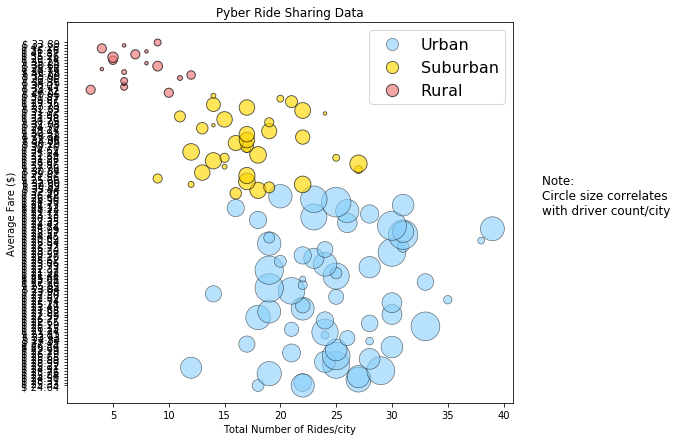

In [43]:
bubble_size = 12
bubsi = bubble_size
plt.figure(figsize=(8,7))

urban_bub = plt.scatter(urban_df.TotalRides, urban_df.AverageFare, c = "lightskyblue", label = "Urban",
                        s = (urban_df.TotalDrivers * bubsi), alpha = 0.6, edgecolor = "black", linewidths = .6)

sub_bub = plt.scatter(sub_df.TotalRides, sub_df.AverageFare, c = "gold", label = "Suburban",
                        s = (sub_df.TotalDrivers * bubsi), alpha = 0.65, edgecolor = "black", linewidths = .9)

rural_bub = plt.scatter(rural_df.TotalRides, rural_df.AverageFare, c = "lightcoral", label = "Rural",
                        s = (rural_df.TotalDrivers * bubsi), alpha = 0.7, edgecolor = "black", linewidths = 1)

legend = plt.legend(handles=[urban_bub, sub_bub, rural_bub], scatterpoints=1, fontsize=16)
legend.legendHandles[0]._sizes = [150]
legend.legendHandles[1]._sizes = [150]
legend.legendHandles[2]._sizes = [150]
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides/city")
plt.ylabel("Average Fare ($)")
plt.figtext(.95, .5, "Note: \nCircle size correlates \nwith driver count/city", fontsize=12)

#Outliers - uncomment below please
#plt.xlim(2,40)
#plt.ylim(15,45)

plt.show()
#I'm missing something with my Y-axis. It shouldn't be in tiny increments. 

In [54]:
#Pie Chart Data
merge_grp = city_ride.groupby(["type"])
city_grp = city_data.groupby(["type"])

#Pie1
fare1_total = city_ride["fare"].sum()
grp_fare = merge_grp["fare"].sum()

gfc_total = grp_fare / fare1_total

#Pie2
ride_total = city_ride["ride_id"].count()
grp_ride = merge_grp["ride_id"].count()

grc_total = grp_ride / ride_total

#Pie3
driver_total = city_ride["driver_count"].sum()
grp_driver = merge_grp["driver_count"].sum()

gdc_total = grp_driver / driver_total 

print(gfc_total)
print(grc_total)
print(gdc_total)


type
Rural       0.068115
Suburban    0.304639
Urban       0.627246
Name: fare, dtype: float64
type
Rural       0.052632
Suburban    0.263158
Urban       0.684211
Name: ride_id, dtype: float64
type
Rural       0.007816
Suburban    0.124729
Urban       0.867456
Name: driver_count, dtype: float64


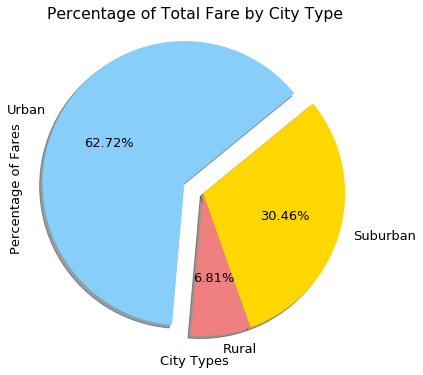

In [55]:
#Pie 1: Total Fare

explode = (0, 0, 0.15)
labels = gfc_total.index.tolist()
colors = ["lightcoral", "gold", "lightskyblue"]
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 13.0
plt.pie(gfc_total, labels = labels, explode = explode, colors = colors, startangle = 265, shadow = True, autopct="%1.2f%%")
plt.axis("equal")
plt.title("Percentage of Total Fare by City Type")
plt.xlabel("City Types")
plt.ylabel("Percentage of Fares")

plt.show()

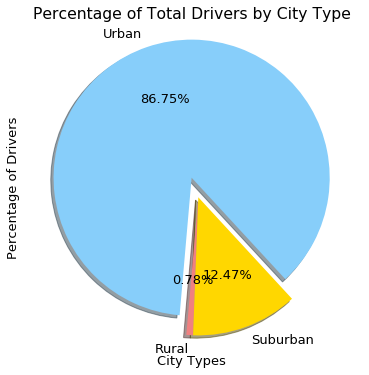

In [57]:
#Pie 2: Driver x City
explode = (0, 0, 0.15)
labels = gdc_total.index.tolist()
colors = ["lightcoral", "gold", "lightskyblue"]
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 13.0
plt.pie(gdc_total, labels = labels, explode = explode, colors = colors, startangle = 265, shadow = True, autopct="%1.2f%%")
plt.axis("equal")
plt.title("Percentage of Total Drivers by City Type")
plt.xlabel("City Types")
plt.ylabel("Percentage of Drivers")

plt.show()

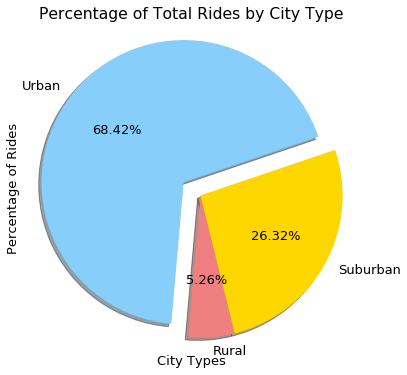

In [58]:
#Pie 3: rides x City
explode = (0, 0, 0.15)
labels = grc_total.index.tolist()
colors = ["lightcoral", "gold", "lightskyblue"]
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 13.0
plt.pie(grc_total, labels = labels, explode = explode, colors = colors, startangle = 265, shadow = True, autopct="%1.2f%%")
plt.axis("equal")
plt.title("Percentage of Total Rides by City Type")
plt.xlabel("City Types")
plt.ylabel("Percentage of Rides")

plt.show()
